<a href="https://colab.research.google.com/github/Akhilaah/ASL/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install easyocr opencv-python pillow numpy matplotlib


In [1]:
!pip install paddlepaddle paddleocr langchain

In [4]:
!pip install --upgrade pip
!pip install paddlepaddle==2.5.2 -i https://mirror.baidu.com/pypi/simple
!pip install "paddleocr==2.6"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
Looking in indexes: https://mirror.baidu.com/pypi/simple
ERROR: Could not find a version that satisfies the requirement paddlepaddle==2.5.2 (from versions: none)
ERROR: No matching distribution found for paddlepaddle==2.5.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 23.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 64.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 112.9 MB/s  0:00:00
  Attempting uninstall: paddleocr
    Found existing installation: paddleocr 3.3.2
    Uninstalling paddleocr-3.3.2:
      Successfully uninstalled paddleocr-3.3.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11/11 [paddleocr]


In [13]:
!pip install transformers sentencepiece torch


In [14]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image

processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

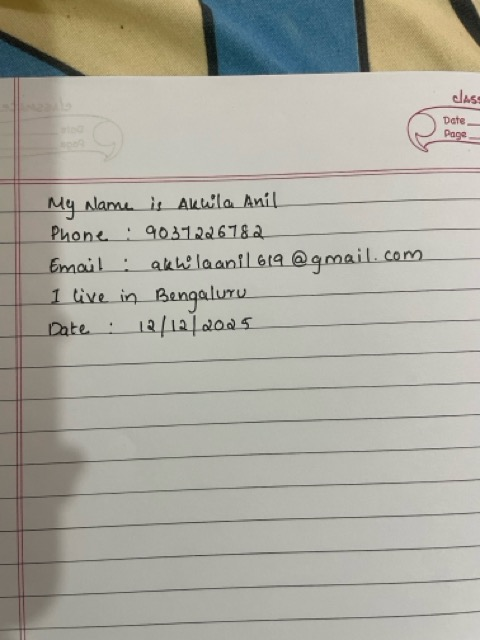

In [15]:
image = Image.open("med.jpeg").convert("RGB")
image


In [16]:
import torch

pixel_values = processor(images=image, return_tensors="pt").pixel_values
generated_ids = model.generate(pixel_values)
text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

print("=== HANDWRITTEN OCR RESULT ===")
print(text)


=== HANDWRITTEN OCR RESULT ===
The Burden


In [17]:
from google.colab import files
uploaded = files.upload()

Saving Akhi Large.jpeg to Akhi Large.jpeg


(np.float64(-0.5), np.float64(959.5), np.float64(1279.5), np.float64(-0.5))

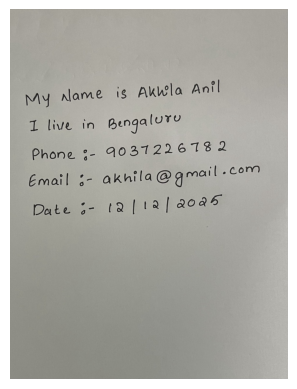

In [18]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = "Akhi Large.jpeg"
image = Image.open(image_path).convert("RGB")

plt.imshow(image)
plt.axis('off')


preprocessor_config.json:   0%|          | 0.00/272 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/327 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/238 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/246M [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-small-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

=== FIXED HANDWRITTEN OCR RESULT ===
HelpLearn to editCommunity portalRecent changesUpload file


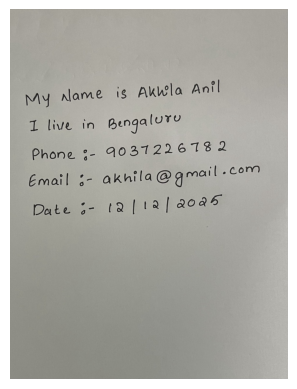

In [20]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import matplotlib.pyplot as plt
import torch

# Use SMALL model (fast + accurate)
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-small-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-small-handwritten")

image = Image.open("Akhi Large.jpeg").convert("RGB")
plt.imshow(image)
plt.axis('off')

pixel_values = processor(images=image, return_tensors="pt").pixel_values
generated_ids = model.generate(pixel_values)
text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

print("=== FIXED HANDWRITTEN OCR RESULT ===")
print(text)


In [23]:
from transformers import Pix2StructProcessor, Pix2StructForConditionalGeneration
from PIL import Image
import torch

# Load model
processor = Pix2StructProcessor.from_pretrained("google/pix2struct-textcaps-large")
model = Pix2StructForConditionalGeneration.from_pretrained("google/pix2struct-textcaps-large")

# Load your image
image = Image.open("Akhi Large.jpeg").convert("RGB")

# Preprocess
inputs = processor(images=image, return_tensors="pt")

# Generate output
pred_ids = model.generate(**inputs, max_length=300)
text = processor.batch_decode(pred_ids, skip_special_tokens=True)[0]

print("=== PIX2STRUCT OCR RESULT ===")
print(text)


preprocessor_config.json:   0%|          | 0.00/231 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/851k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

=== PIX2STRUCT OCR RESULT ===
A white board with a message that says My Name is Akhila Anil.


In [1]:
from transformers import Pix2StructProcessor, Pix2StructForConditionalGeneration
from PIL import Image

processor = Pix2StructProcessor.from_pretrained("google/pix2struct-textcaps-large")
model = Pix2StructForConditionalGeneration.from_pretrained("google/pix2struct-textcaps-large")

image = Image.open("Akhi Large.jpeg").convert("RGB")

# OCR prompt improves extraction
prompt = "Read all the handwritten text clearly:"

inputs = processor(text=prompt, images=image, return_tensors="pt")

pred_ids = model.generate(
    **inputs,
    max_length=400,      # BIGGER OUTPUT
    num_beams=5,         # BETTER QUALITY
    no_repeat_ngram_size=2
)

text = processor.batch_decode(pred_ids, skip_special_tokens=True)[0]

print("=== FULL PIX2STRUCT OCR RESULT ===")
print(text)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


=== FULL PIX2STRUCT OCR RESULT ===
Read all the handwritten text clearly: 'My Name is Akhila Anil' I live in Bengaluru Phone :- 9037226782 Email ’s- akhila@gmail.com Date - 18/11/2006
